### Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

energy_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\EnergyPrice Prediction using Machine Learning\energy_dataset.csv')
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


### Exploratory Data Analysis

In [2]:
energy_data.shape

(16569, 29)

In [3]:
energy_data.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [4]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         16569 non-null  object 
 1   generation biomass                           16552 non-null  float64
 2   generation fossil brown coal/lignite         16552 non-null  float64
 3   generation fossil coal-derived gas           16552 non-null  float64
 4   generation fossil gas                        16552 non-null  float64
 5   generation fossil hard coal                  16552 non-null  float64
 6   generation fossil oil                        16551 non-null  float64
 7   generation fossil oil shale                  16552 non-null  float64
 8   generation fossil peat                       16552 non-null  float64
 9   generation geothermal                        16552 non-null  float64
 10

In [6]:
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,16552.0,433.164149,91.221395,101.00,358.00,448.00,513.00,592.00
generation fossil brown coal/lignite,16552.0,431.282262,389.813397,0.00,0.00,448.00,865.00,997.00
generation fossil coal-derived gas,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation fossil gas,16552.0,5022.886056,1728.186065,1518.00,3921.00,4597.00,5620.00,16250.00
generation fossil hard coal,16552.0,4453.370408,2168.005375,576.00,2401.75,4839.50,6194.00,8359.00
generation fossil oil,16551.0,310.129418,59.506841,87.00,271.00,306.00,354.00,449.00
generation fossil oil shale,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation fossil peat,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation geothermal,16552.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
energy_data.isnull().sum()

time                                               0
generation biomass                                17
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     16569
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                        17
generation solar                              

In [8]:
energy_data = energy_data.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'], axis = 1)

In [9]:
energy_data = energy_data.dropna()

In [10]:
energy_data.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [11]:
energy_data.nunique()

time                                           16527
generation biomass                               420
generation fossil brown coal/lignite             918
generation fossil coal-derived gas                 1
generation fossil gas                           5478
generation fossil hard coal                     6521
generation fossil oil                            312
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     2796
generation hydro run-of-river and poundage      1586
generation hydro water reservoir                6267
generation marine                                  1
generation nuclear                              1872
generation other                                  96
generation other renewable                        60
generation solar                                4443
generation waste                              

In [12]:
energy_data = energy_data.drop(['time'], axis = 1)

In [13]:
round((energy_data.isnull().sum()/len(energy_data)*100),2)

generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil coal-derived gas             0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation fossil oil shale                    0.0
generation fossil peat                         0.0
generation geothermal                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation marine                              0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind offshore                       0.0
generation wind onshore        

In [14]:
energy_data.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.269333,NaN,0.084413,0.493783,0.501004,NaN,NaN,NaN,-0.084706,...,-0.042877,-0.125411,NaN,-0.040659,-0.045573,-0.042073,0.142781,0.141721,0.432945,0.459019
generation fossil brown coal/lignite,0.269333,1.000000,NaN,0.559411,0.836700,0.362161,NaN,NaN,NaN,-0.365730,...,0.061419,0.421326,NaN,-0.489034,0.064092,-0.489490,0.286581,0.288229,0.692398,0.452190
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,0.084413,0.559411,NaN,1.000000,0.591846,0.355537,NaN,NaN,NaN,-0.442106,...,0.054442,0.330771,NaN,-0.469760,0.063064,-0.470954,0.508284,0.512968,0.691463,0.455885
generation fossil hard coal,0.493783,0.836700,NaN,0.591846,1.000000,0.493768,NaN,NaN,NaN,-0.455732,...,0.072058,0.368203,NaN,-0.525176,0.075260,-0.526793,0.366005,0.368105,0.834051,0.595878
generation fossil oil,0.501004,0.362161,NaN,0.355537,0.493768,1.000000,NaN,NaN,NaN,-0.369389,...,0.085478,-0.112008,NaN,-0.077952,0.086007,-0.080335,0.525350,0.523693,0.505045,0.478884
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage consumption,-0.084706,-0.365730,NaN,-0.442106,-0.455732,-0.369389,NaN,NaN,NaN,1.000000,...,-0.249971,-0.250089,NaN,0.381634,-0.258057,0.383353,-0.606973,-0.609581,-0.624625,-0.428538


In [15]:
correlations = energy_data.corr(method='pearson')

In [16]:
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.733410
generation fossil hard coal                    0.595878
generation fossil oil                          0.478884
generation biomass                             0.459019
generation fossil gas                          0.455885
generation fossil brown coal/lignite           0.452190
total load forecast                            0.413760
total load actual                              0.410439
generation other                               0.295537
forecast solar day ahead                       0.127138
generation solar                               0.123990
generation waste                               0.025184
generation hydro water reservoir               0.015521
generation nuclear                            -0.058056
generation other renewable                    -0.100459
generation wind onshore                       -0.245027
forecast wind onshore day ahead               -0

In [17]:
null_val_cols = ['generation marine','generation geothermal','generation fossil peat','generation wind offshore','generation fossil oil shale','generation fossil coal-derived gas']

In [18]:
heat_map_features = energy_data.drop(columns=null_val_cols,axis=1)

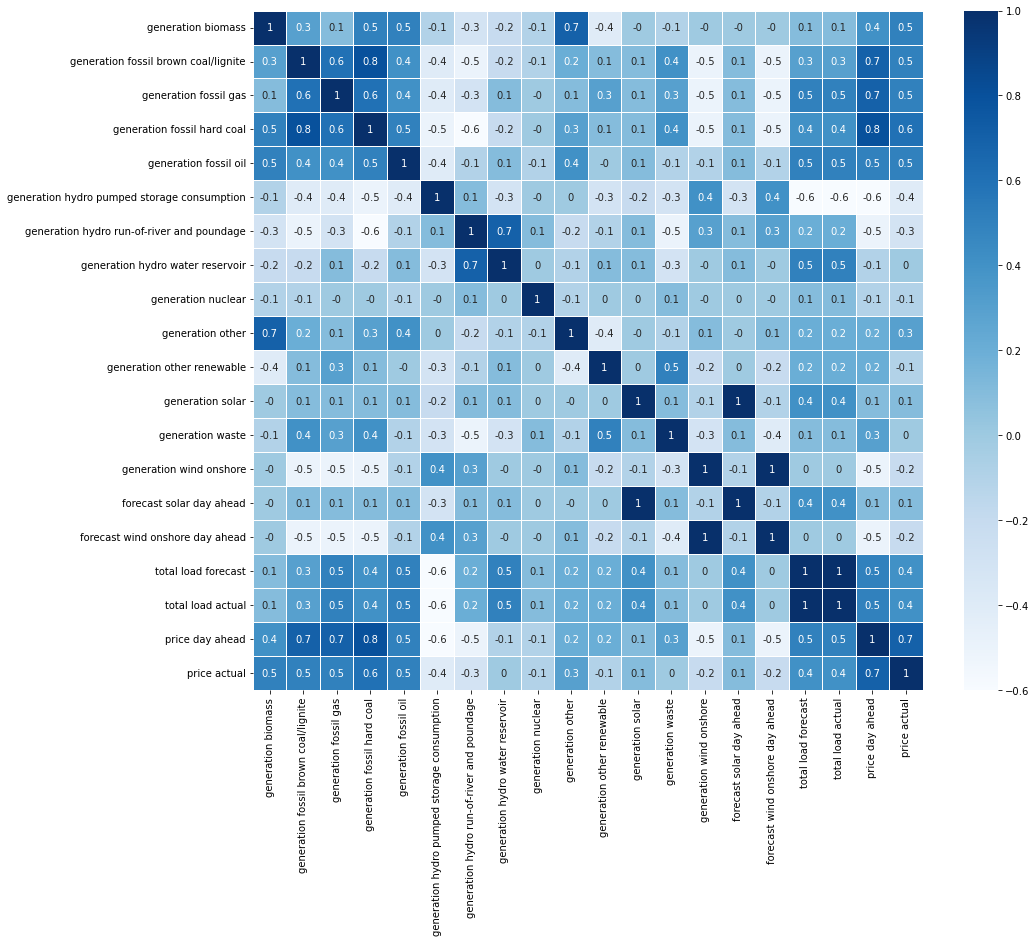

In [19]:
plt.figure(figsize=(15,12.5))
sns.heatmap(round(heat_map_features.corr(),1),annot=True,
cmap='Blues',linewidth=0.9)
plt.show();

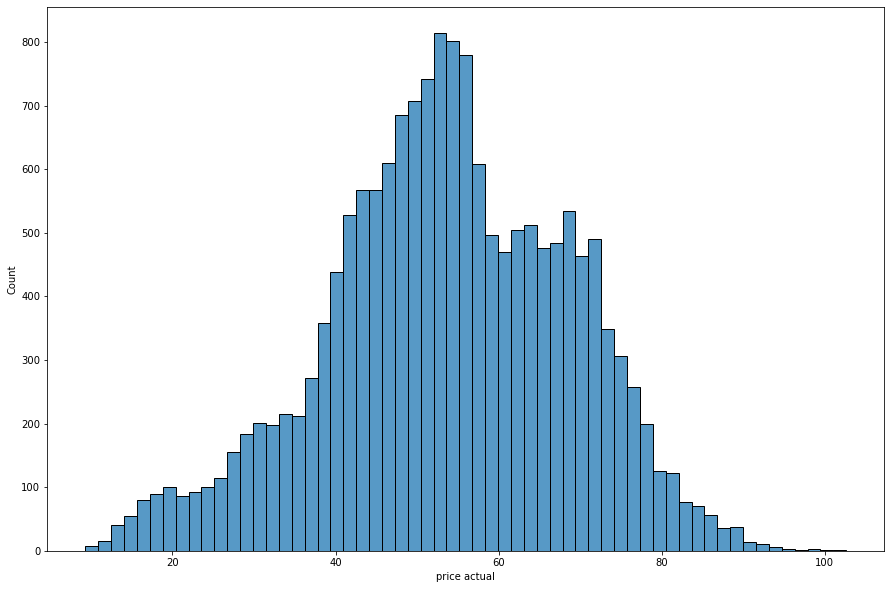

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(energy_data,x='price actual');
plt.show();

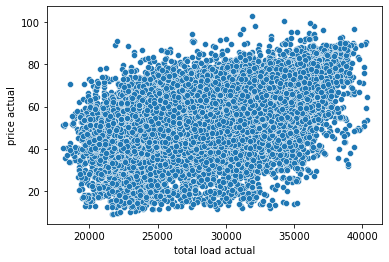

In [22]:
sns.scatterplot(x='total load actual',y='price actual',data = energy_data);

### Selecting Target & Feature variable

In [23]:
x = energy_data.drop(['price actual'], axis = 1)
y = energy_data['price actual']

### Splitting Data into Train & Test

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Building - Linear Regression

In [25]:
from sklearn.linear_model import Ridge, LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [26]:
y_pred = model.predict(xtest)

### Accuracy Score of Model

In [27]:
print("Training Accuracy :", model.score(xtrain, ytrain))
print("Testing Accuracy :", model.score(xtest, ytest))

Training Accuracy : 0.6180465791911046
Testing Accuracy : 0.619945448043943


### Model Building - Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

In [29]:
y_pred = regressor.predict(xtest)

### Accuracy Score of Model

In [30]:
print("Training Accuracy :", regressor.score(xtrain, ytrain))
print("Testing Accuracy :", regressor.score(xtest, ytest))

Training Accuracy : 0.9813045916001729
Testing Accuracy : 0.8822652454663046
